In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Problem Definition
Based on the introduction the key challenge is to predict if an individual customer will churn or not. To accomplish that, machine learning models are trained based on 80% of the sample data. The remaining 20% are used to apply the trained models and assess their predictive power with regards to “churn / not churn”. A side question will be, which features actually drive customer churn. That information can be used to identify customer “pain points” and resolve them by providing goodies to make customers stay.

To compare models and select the best for this task, the accuracy is measured. Based on other characteristics of the data, for example the balance between classes (number of “churners” vs. “non-churners” in data set) further metrics are considered if needed.

# Data Collection
The data can also be found at :- https://www.kaggle.com/blastchar/telco-customer-churn

In [2]:
data = pd.read_csv('Telco-Customer-Churn.csv')

In [3]:
df = data.copy()

# EDA 

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Description of the features

Classification labels
* Churn — Whether the customer churned or not (Yes or No)

Customer services booked
* PhoneService — Whether the customer has a phone service (Yes, No)
* MultipleLines — Whether the customer has multiple lines (Yes, No, No phone service)
* InternetService — Customer’s internet service provider (DSL, Fiber optic, No)
* OnlineSecurity — Whether the customer has online security (Yes, No, No internet service)
* OnlineBackup — Whether the customer has online backup (Yes, No, No internet service)
* DeviceProtection — Whether the customer has device protection (Yes, No, No internet service)
* TechSupport — Whether the customer has tech support (Yes, No, No internet service)
* StreamingTV — Whether the customer has streaming TV (Yes, No, No internet service)
* StreamingMovies — Whether the customer has streaming movies (Yes, No, No internet service)

Customer account information
* Tenure — Number of months the customer has stayed with the company
* Contract — The contract term of the customer (Month-to-month, One year, Two year)
* PaperlessBilling — Whether the customer has paperless billing (Yes, No)
* PaymentMethod — The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
* MonthlyCharges — The amount charged to the customer monthly
* TotalCharges — The total amount charged to the customer

Customers demographic info
* customerID — Customer ID
* Gender — Whether the customer is a male or a female
* SeniorCitizen — Whether the customer is a senior citizen or not (1, 0)
* Partner — Whether the customer has a partner or not (Yes, No)
* Dependents — Whether the customer has dependents or not (Yes, No)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [7]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
# Checking out the uniwue value in each column
unique_categories_num = {}
for i in df.columns:
    unique_categories_num[i] = df[i].nunique()
res = pd.DataFrame(index=df.columns, data=unique_categories_num.values(), columns=['Unique categories'])

In [9]:
unique_categories_num.values()

dict_values([7032, 2, 2, 2, 2, 72, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 4, 1584, 6530, 2])

In [10]:
res

,Unique categories
customerID,7032
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,72
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3


### Hypothesis Building
Looking at the features included in data and connecting them to their potential influence on customer churn, the following hypotheses can be made:
* The longer the contract duration the less likely it is that the customer will churn as he/she is less frequently confronted with the termination/prolongation decision and potentially values contracts with reduced effort.
* Customers are willing to cancel simple contracts with few associated product components quicker and more often than complexer product bundles — for bundles customers value the reduced administrative complexity. They might also be hesitant to cancel a contract, when they depend on the additional service components (e.g. security packages).
* Customers with spouses and children might churn less to keep the services running for their family.
* Tenure, contract duration terms and number of additional services are assumed to be among the most important drivers of churn.
* More expensive contracts lead to increased churn as the chances to save money by changing providers might be higher.
Senior citizens tend to churn less due to the extended effort associated with terminating contracts.

## Data Exploration

In [11]:
df['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [12]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

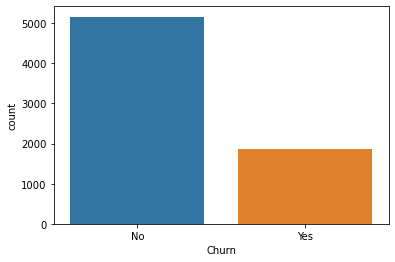

In [13]:
sns.countplot(data=df, x='Churn');

Looks like we have class imbalance here, b/w people who Churn and people who don't.

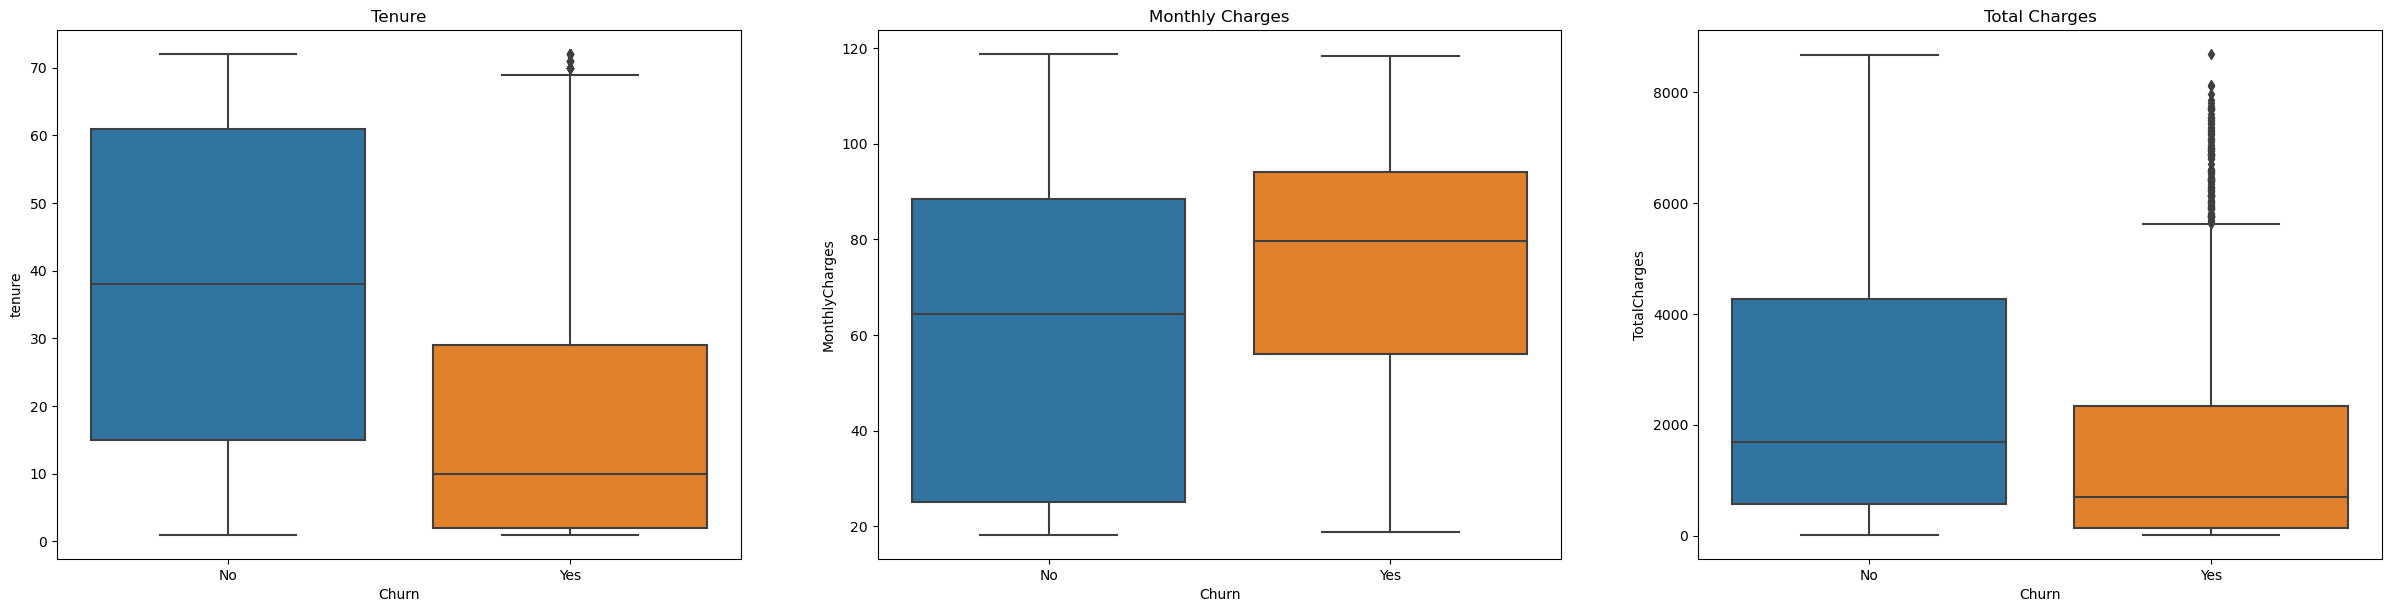

In [14]:
plt.figure(figsize=(30,7),dpi=100)
plt.subplot(1,3,1)
sns.boxplot(data=df, y='tenure', x='Churn')
plt.title('Tenure')

plt.subplot(1,3,2)
sns.boxplot(data=df, y='MonthlyCharges', x='Churn')
plt.title('Monthly Charges')

plt.subplot(1,3,3)
sns.boxplot(data=df, y='TotalCharges', x='Churn')
plt.title('Total Charges');

### Insights from above plots:-
1. Customers who churn have lower tenure with median at 10 months than those who dont i.e. non churner with median tenure of 38 months.

2. Churning customers have higher monthly charges with a median of ca. 80 USD and much lower interquartile range compared to that of non-churners (median of ca. 65 USD).

3. TotalCharges are the result of tenure and MonthlyCharges, which are more insightful on an individual basis. Though we can still see that Churners with high monthly charges have less total charge as they have lower tenure and vice-versa.

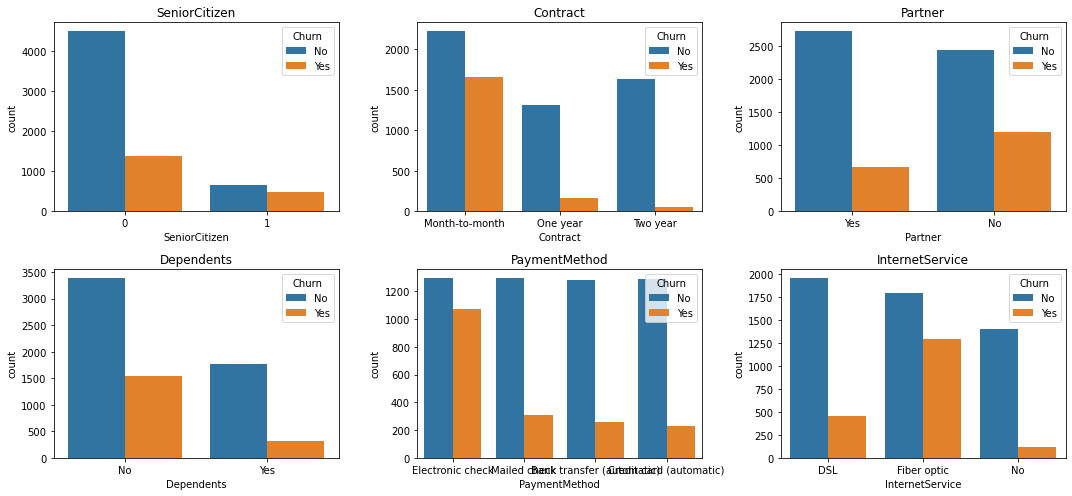

In [15]:
fig, axes = plt.subplots(2,3, figsize=(15,7))

sns.countplot(ax = axes[0,0],data = df, x = 'SeniorCitizen', hue='Churn')
axes[0,0].set_title('SeniorCitizen')
plt.tight_layout()

sns.countplot(ax = axes[0,1],data = df, x = 'Contract', hue='Churn')
axes[0,1].set_title('Contract')
plt.tight_layout()

sns.countplot(ax = axes[0,2],data = df, x = 'Partner', hue='Churn')
axes[0,2].set_title('Partner')
plt.tight_layout()


sns.countplot(ax = axes[1,0],data = df, x = 'Dependents', hue='Churn')
axes[1,0].set_title('Dependents')
plt.tight_layout()


sns.countplot(ax = axes[1,1],data = df, x = 'PaymentMethod', hue='Churn')
axes[1,1].set_title('PaymentMethod')
plt.tight_layout()

sns.countplot(ax = axes[1,2],data = df, x = 'InternetService', hue='Churn')
axes[1,2].set_title('InternetService')
plt.tight_layout()

### Insights from above plot:
1. Senior citizens churn rate is much higher than non-senior churn rate.
2. Churn rate for month-to-month contracts much higher that for other contract durations.
3. Moderately higher churn rate for customers without partners.
4. Much higher churn rate for customers without children.
5. Payment method electronic check shows much higher churn rate than other payment methods.
6. Customers with InternetService fiber optic as part of their contract have much higher churn rate.

In [16]:
# Checking for outliers in numerical cols
numerical_cols = ['tenure','MonthlyCharges','TotalCharges']
df_num = df[numerical_cols]
df_num.describe()

Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
#IQR

((df_num < (Q1 - 1.5*IQR)) | (df_num > (Q3 + 1.5*IQR))).any()

tenure            False
MonthlyCharges    False
TotalCharges      False
dtype: bool

We don't have outliers in our data.

## Feature Engineering

In [17]:
# Removing Customer ID as it does not have any significance
df.drop('customerID',axis=1 ,inplace=True)

In [18]:
# Adding an extra cohort analysis columns
def cohort(tenure):
    if tenure < 13:
        return '0-12 Months'
    elif tenure < 25:
        return '12-24 Months'
    elif tenure < 49: 
        return '24-48 Months'
    else:
        return 'Over 48 Months'

In [19]:
df['Tenure Cohort'] = df['tenure'].apply(cohort)

In [20]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure Cohort
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0-12 Months
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,24-48 Months
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0-12 Months
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,24-48 Months
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0-12 Months


In [21]:
def apply(churn):
    if churn == 'Yes':
        return 1
    else:
        return 0

In [22]:
df['Churn'] = df['Churn'].apply(apply)

In [23]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure Cohort
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0-12 Months
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,0,24-48 Months
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,0-12 Months
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,24-48 Months
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,0-12 Months


In [24]:
# Converting categorical data into int
df = pd.get_dummies(df, drop_first=True)

In [25]:
df[['tenure','MonthlyCharges','TotalCharges']]

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65
...,...,...,...
7027,24,84.80,1990.50
7028,72,103.20,7362.90
7029,11,29.60,346.45
7030,4,74.40,306.60


In [26]:
# Feature scaling of the above 3 cols
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

features_scale = ['tenure','MonthlyCharges','TotalCharges']
df_features_scale = df[['tenure','MonthlyCharges','TotalCharges']]
df_remaining_features = df.drop(columns=features_scale)

rescaled_features = scaler.fit_transform(df_features_scale)

df_rescaled_features = pd.DataFrame(rescaled_features, columns=features_scale, index=df_remaining_features.index)

df = pd.concat([df_remaining_features, df_rescaled_features], axis=1)

In [27]:
df.head()

,SeniorCitizen,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,...,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Tenure Cohort_12-24 Months,Tenure Cohort_24-48 Months,Tenure Cohort_Over 48 Months,tenure,MonthlyCharges,TotalCharges
0,0,0,0,1,0,0,1,0,0,0,...,1,0,1,0,0,0,0,-1.280248,-1.161694,-0.994194
1,0,0,1,0,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0.064303,-0.260878,-0.173740
2,0,1,1,0,0,1,0,0,0,0,...,1,0,0,1,0,0,0,-1.239504,-0.363923,-0.959649
3,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0.512486,-0.747850,-0.195248
4,0,1,0,0,0,1,0,0,1,0,...,1,0,1,0,0,0,0,-1.239504,0.196178,-0.940457


In [28]:
df.corr()['Churn']

SeniorCitizen                            0.150541
Churn                                    1.000000
gender_Male                             -0.008545
Partner_Yes                             -0.149982
Dependents_Yes                          -0.163128
PhoneService_Yes                         0.011691
MultipleLines_No phone service          -0.011691
MultipleLines_Yes                        0.040033
InternetService_Fiber optic              0.307463
InternetService_No                      -0.227578
OnlineSecurity_No internet service      -0.227578
OnlineSecurity_Yes                      -0.171270
OnlineBackup_No internet service        -0.227578
OnlineBackup_Yes                        -0.082307
DeviceProtection_No internet service    -0.227578
DeviceProtection_Yes                    -0.066193
TechSupport_No internet service         -0.227578
TechSupport_Yes                         -0.164716
StreamingTV_No internet service         -0.227578
StreamingTV_Yes                          0.063254


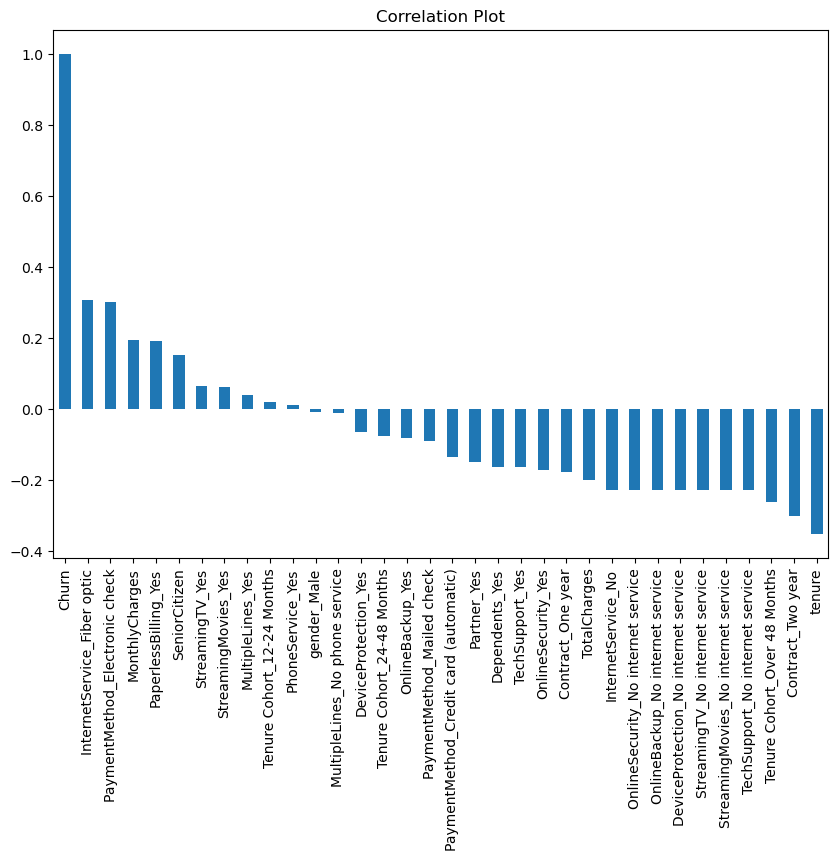

In [29]:
# Let's see the correlation plot

plt.figure(figsize=(10,7),dpi=100)
df.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')
plt.title('Correlation Plot');

In [30]:
df.head()

,SeniorCitizen,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,...,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Tenure Cohort_12-24 Months,Tenure Cohort_24-48 Months,Tenure Cohort_Over 48 Months,tenure,MonthlyCharges,TotalCharges
0,0,0,0,1,0,0,1,0,0,0,...,1,0,1,0,0,0,0,-1.280248,-1.161694,-0.994194
1,0,0,1,0,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0.064303,-0.260878,-0.173740
2,0,1,1,0,0,1,0,0,0,0,...,1,0,0,1,0,0,0,-1.239504,-0.363923,-0.959649
3,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0.512486,-0.747850,-0.195248
4,0,1,0,0,0,1,0,0,1,0,...,1,0,1,0,0,0,0,-1.239504,0.196178,-0.940457


In [31]:
X = df.drop('Churn', axis=1)
y = df['Churn']

# Train test split

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [33]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5625 entries, 850 to 4959
Data columns (total 33 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          5625 non-null   int64  
 1   gender_Male                            5625 non-null   uint8  
 2   Partner_Yes                            5625 non-null   uint8  
 3   Dependents_Yes                         5625 non-null   uint8  
 4   PhoneService_Yes                       5625 non-null   uint8  
 5   MultipleLines_No phone service         5625 non-null   uint8  
 6   MultipleLines_Yes                      5625 non-null   uint8  
 7   InternetService_Fiber optic            5625 non-null   uint8  
 8   InternetService_No                     5625 non-null   uint8  
 9   OnlineSecurity_No internet service     5625 non-null   uint8  
 10  OnlineSecurity_Yes                     5625 non-null   uint8  
 11  On

# Model 

### 1. Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegressionCV

In [35]:
logistic_model = LogisticRegressionCV()

In [36]:
logistic_model.fit(X_train, y_train)

C:\Users\Karthik\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Karthik\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

LogisticRegressionCV()

In [37]:
logistic_model.get_params()

{'Cs': 10,
 'class_weight': None,
 'cv': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'refit': True,
 'scoring': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

Above we can see the best performing hyperparameters that the model chose after Cross validation.

In [87]:
logistic_model.coef_[0]

array([ 0.22259091,  0.03379019, -0.02021015, -0.12844935, -0.25525315,
        0.25482906,  0.21419773,  0.59075589, -0.09764764, -0.09764764,
       -0.41444298, -0.09764764, -0.1413127 , -0.09764764, -0.05352717,
       -0.09764764, -0.40457839, -0.09764764,  0.16606994, -0.09764764,
        0.12295544, -0.53740483, -0.91521634,  0.30636066, -0.11550928,
        0.31733125, -0.09052428, -0.35850459, -0.1986002 ,  0.08693579,
       -0.85328826,  0.29280455, -0.02547671])

In [92]:
# Creating a Dataframe acc to feature coeff
logmodel_feat = pd.DataFrame({'Features':X.columns, 'Feature Importance':logistic_model.coef_[0]})
logmodel_feat = logmodel_feat.sort_values(by='Feature Importance')

In [93]:
logmodel_feat

,Features,Feature Importance
22,Contract_Two year,-0.915216
30,tenure,-0.853288
21,Contract_One year,-0.537405
10,OnlineSecurity_Yes,-0.414443
16,TechSupport_Yes,-0.404578
27,Tenure Cohort_12-24 Months,-0.358505
4,PhoneService_Yes,-0.255253
28,Tenure Cohort_24-48 Months,-0.198600
12,OnlineBackup_Yes,-0.141313
3,Dependents_Yes,-0.128449


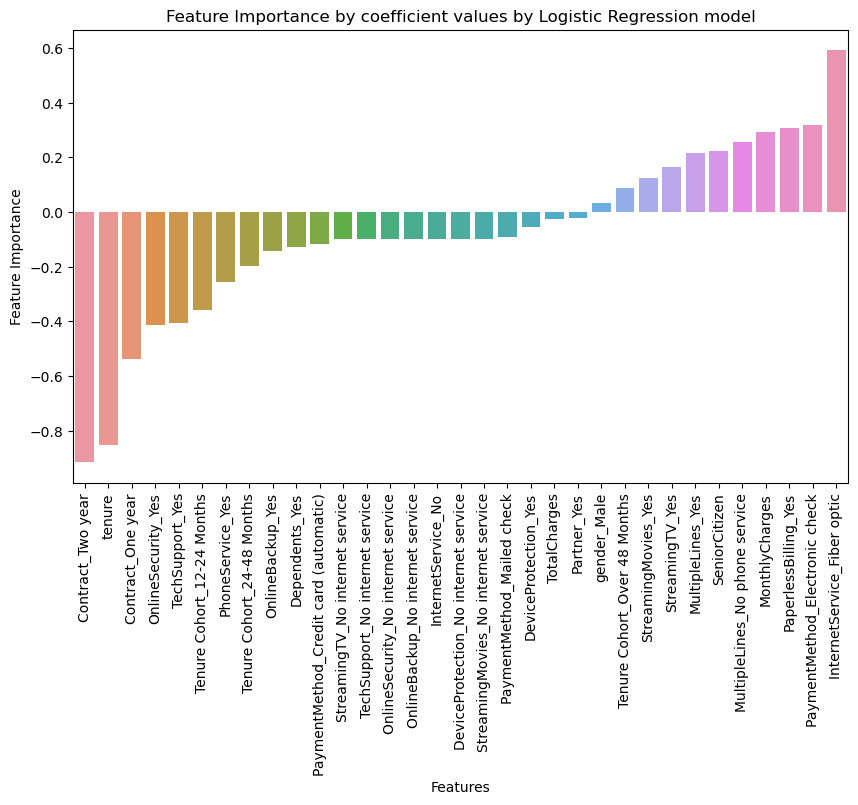

In [95]:
plt.figure(figsize=(10,6),dpi=100)
sns.barplot(data=logmodel_feat, x='Features', y='Feature Importance')
plt.xticks(rotation=90)
plt.title('Feature Importance by coefficient values by Logistic Regression model');

In [78]:
logistic_model.Cs_

array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04])

In [38]:
# predictions
logistic_preds = logistic_model.predict(X_test)

### Evaluation

In [39]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix

In [69]:
print('Accuracy of Logistic Regression model:- ',accuracy_score(y_test, logistic_preds) * 100,'%')

Accuracy of Logistic Regression model:-  81.16560056858563 %


<Figure size 800x600 with 0 Axes>

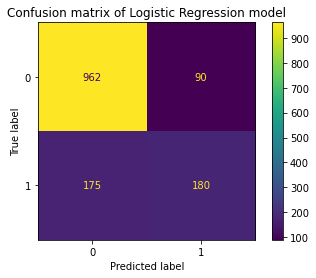

In [41]:
plt.figure(figsize=(8,6),dpi=100)
plot_confusion_matrix(logistic_model, X_test, y_test)
plt.title('Confusion matrix of Logistic Regression model');

In [42]:
confusion_matrix(y_test, logistic_preds)

array([[962,  90],
       [175, 180]], dtype=int64)

In [43]:
print(classification_report(y_test, logistic_preds))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1052
           1       0.67      0.51      0.58       355

    accuracy                           0.81      1407
   macro avg       0.76      0.71      0.73      1407
weighted avg       0.80      0.81      0.80      1407



## 2.KNN - K Nearest Neighbors

In [44]:
from sklearn.neighbors import KNeighborsClassifier

In [45]:
knn_model = KNeighborsClassifier()

In [46]:
from sklearn.model_selection import GridSearchCV

We will GridSearchCV for finding out the best hyperparameter values.

In [47]:
k_val = list(range(1,20))
parameter_grid = {'n_neighbors':k_val}

In [48]:
grid_model_knn = GridSearchCV(estimator=knn_model, param_grid=parameter_grid,
                             scoring='accuracy')

In [49]:
grid_model_knn.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [50]:
# Let's see the best parameters selected by the model
grid_model_knn.best_estimator_.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 18,
 'p': 2,
 'weights': 'uniform'}

### So the model selected K = 18 as the best value

In [53]:
# Predictions
knn_preds = grid_model_knn.predict(X_test)

### Evaluation

In [68]:
print('Accuracy of KNN model is :- ',accuracy_score(y_test, knn_preds) * 100,'%')

Accuracy of KNN model is :-  79.24662402274343 %


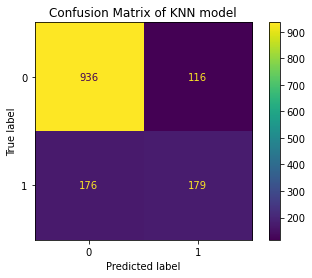

In [55]:
plot_confusion_matrix(grid_model_knn, X_test, y_test)
plt.title('Confusion Matrix of KNN model');

In [56]:
print(classification_report(y_test, knn_preds))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1052
           1       0.61      0.50      0.55       355

    accuracy                           0.79      1407
   macro avg       0.72      0.70      0.71      1407
weighted avg       0.78      0.79      0.79      1407



## 3.SVM - Support Vector Machine

In [57]:
from sklearn.svm import SVC

In [58]:
svm_model = SVC()

In [59]:
# parameter grid for gridsearchcv
param_grid2 = {'kernel':['linear','rbf'],'C':[0.01,0.1,1]}

In [60]:
grid_model_svm = GridSearchCV(estimator=svm_model, param_grid=param_grid2,
                             scoring='accuracy')

In [61]:
grid_model_svm.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [62]:
# Best hyperparameter values 
grid_model_svm.best_estimator_.get_params()

{'C': 1,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [63]:
# Predictions
svm_preds = grid_model_svm.predict(X_test)

### Evaluation

In [67]:
print('Accuracy of SVM model is:- ',accuracy_score(y_test, svm_preds) * 100,'%')

Accuracy of SVM model is:-  81.09452736318407 %


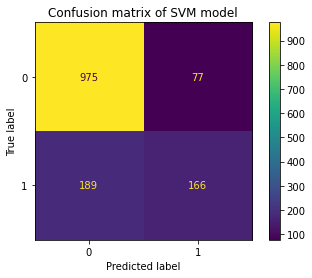

In [65]:
plot_confusion_matrix(grid_model_svm, X_test, y_test)
plt.title('Confusion matrix of SVM model');

In [66]:
print(classification_report(y_test, svm_preds))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88      1052
           1       0.68      0.47      0.56       355

    accuracy                           0.81      1407
   macro avg       0.76      0.70      0.72      1407
weighted avg       0.80      0.81      0.80      1407



## I will continue the Predictive modelling of this project with advanced tree based methods in part 2 of this notebook alongwith EDA and additional Cohort analysis.